# Powerless Women or Defeated Man:Depictions of Gender in Edgar Allen Poe's Short Stories

## Linsey Dinh

12 August 2021

Introduction to Computational Literary Analysis

Department of English and Comparative Literature, Columbia University

Instructor: Jonathan Reeve

#### Importing My Libraries

In [381]:
#Here are my libraries
import nltk
import pandas as pd
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import os
import matplotlib.pyplot as plt
import numpy as np
import spacy
nlp = spacy.load('en_core_web_lg')
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

#### Importing My Corpus

In [1084]:
os.chdir('C:\\Users\\19092\\course-computational-literary-analysis\\Homework\\Corpus')
EAPVol2 = open('EAPText.txt', encoding="utf8").read()

In [1085]:
Letter, Scheherazade, Maelstrom, VonKempelen, MesmericRevelation, MValdemar, TheBlackCat, Usher, Fable, RedDeath, Amontillado, Perverse, Island, Assignation, Pendulum, Burial, Arnheim, Cottage, WilliamWilson, Heart, Berenice, Eleonora= [EAPVol2.split('\n\n\n\n\n')[i] for i in range(3,25)]

In [1086]:
MyCorpus = [Letter, Scheherazade, Maelstrom, VonKempelen, MesmericRevelation, MValdemar, TheBlackCat, Usher, Fable, RedDeath, Amontillado, Perverse, Island, Assignation, Pendulum, Burial, Arnheim, Cottage, WilliamWilson, Heart, Berenice, Eleonora]
Titles = ['The Purloined Letter','The Thousand-and-second Tale of Scheherezade', "A Descent into the Maelström", "Von Kempelen and His Discovery", "Mesmeric Revelation", "The Facts in the Case of M. Valdemar", "The Black Cat"
          , "The Fall of the House of Usher", "Silence: a Fable", "The Masque of the Red Death", "The Cask of Amontillado"
          ,"The Imp of the Perverse", "The Island of the Fay", "The Assignation", "The Pit and the Pendulum", "The Premature Burial"
          , "The Domain of Arnheim", "Landor's Cottage", "William Wilson", "The Tell-tale Heart", "Berenice", "Eleonora"]

### Powerless Women or Defeated Man:Depictions of Gender in Edgar Allen Poe's Short Stories

Edgar Allan Poe is a writer and a poet of the 19th century, best known for his poem The Raven and his other writings about the dark and macabre. Already familiar with some of his works, and deeply interested in the gruesome themes of them, I decided to explore a collection of twenty-two of his short stories for this project. There is no particular order, genre, or categorization to this particular collection of short stories. This is because I had many ideas of what I could do comparatively, if these stories were not constrained by any similar topics, and if I was not completely biased in what I already had knowledge of. I had ideas to possibly analyze symbolism, characters, or common themes across these stories, to see the similarities and differences between them all. However, after reading that one of Poe’s theories was that the death of a beautiful woman is inarguably the most poetic topic in the world, I had a better idea (Martens 8). I wanted to look into his depiction of gender roles in his stories, with his theory in mind. I began with close reading and noticed patterns in his depictions of gender. In many cases, the man was the main character, but also, very hyper masculine, full of anger and violence. When a story did include a female, or in the extremely rare occasion, had her as a main character, they would become victims to male violence, or used only as a plot device to further the male narrative. Therefore, I argue that In Edgar Allen Poe’s short stories, females are objectified, depicted only by their physical characteristics or their helplessness in relation to the man in the story, while men are always in the forefront as the possessors of power. 

   To get an objective of what I wanted to look for within my data analysis, I began by close reading and reviewing some literary articles written on the topic at hand. Aside from Poe’s affinity to dead women in his theory, he emphasizes that the woman has to be beautiful, but also dead (Martens 8). I was inclined to believe from this that a woman’s outer beauty was very important to Poe, and would show up as a device in his stories where there were female characters or if a female was mentioned. In a close reading of “Eleonora”, one of the only stories in my corpus that has a female main character, I did notice that Poe was focused on writing about what I thought he saw as inner and outer beauty. He described Eleonora as “innocent”, “lovely”, “sweet”, and not surprisingly, dead. Taking note of these descriptive words in relation to the main female character, I wanted to see in my computational literary analysis if this happens across all stories with female characters. I suspected that the more the story was focused on a female character, the more adjectives there would be. As my argument focuses a lot on the objectification and utilization of the female as plot devices to further the male narrative, I wanted to know if this shows up in sentence patterns or in a syntactic analysis, even though it was evident in close reading. This concept is exemplified best in “The Purloined Letter”, a story in my corpus about a woman who got her letter stolen from her. Although the story revolves around her letter, she is mentioned only 7 times throughout the whole story. She is only used as the helpless maiden while the masculine, main man, detective Dupin, is painted as the hero (Martens 22). In completing my analysis, I plan to see the context surrounding male and female characters and how both are used within the plot through contextual based analysis, using tools such as concordances, ngrams, and lexical dispersion plots.

   First and foremost, since I am dealing with gender, I knew I had to look at pronoun proportions. How often are females actually included in the stories of Edgar Allen Poe? The answer is, not much. Running into errors because of this along the way, in this varied assortment of short stories, nine stories completely omitted females within the narrative. On top of this, only two out of twenty-two of the short stories had more female pronouns than male pronouns. Though this is telling of how Edgar Allen Poe tends to put males at the forefront of the story compared to females, I wondered if these stories only having male pronouns are just due to the content of the stories. To test this, I did some topic modelling to see what topics the stories with only male pronouns would have. The three topics from my topic model were 'valdemar kempelen von mr discovery',  'man said long death length', 'matter god man life say'. Supplemented with close reading, it seems that most of his stories with solely male pronouns are part of his introspective based narratives: the ones that reflect on life, death, and impulse control. These narratives are thought to be projections of his own tragic and unfortunate life and the repressed desires that came from it (Xiong 95). Therefore, I see how it would be out of place to include female characters in a reflection of his own male mind. Observing these differences, I could now work off of the comparison between stories with only male pronouns, more male pronouns than female pronouns, and more female pronouns than male pronouns. 


In [701]:
#Function to split up which text has more female pronouns vs. male pronouns
def malevsfemale(txt):
    '''function to calcuate male vs. female pronoun ratio'''
    txttokens = nltk.word_tokenize(txt.lower())
    txttokensalpha = [ i for i in txttokens if i.isalpha()]
    txttags = nltk.pos_tag(txttokensalpha)
    pronouns = [word for word,pos in txttags if (pos == 'PRP')]
    femalepronouns=Counter(pronouns)['she']+Counter(pronouns)['her']+Counter(pronouns)['hers']+Counter(pronouns)['herself']
    malepronouns=Counter(pronouns)['he']+Counter(pronouns)['him']+Counter(pronouns)['his']+Counter(pronouns)['himself']
    #if malepronouns/femalepronouns > 0:
        #return malepronouns/femalepronouns
    if femalepronouns == 0:
        return "Only Male"
    elif malepronouns == 0:
        return "Only Female"
    else:
        return malepronouns/femalepronouns

In [703]:
#When I did this with a list comprehension, everything was jumbled up so I did it by hand
genderdataframes = {'The Purloined Letter': malevsfemale(Letter),'The Thousand-and-second Tale of Scheherezade': malevsfemale(Scheherazade), "A Descent into the Maelström":malevsfemale(Maelstrom), "Von Kempelen and His Discovery":malevsfemale(VonKempelen), "Mesmeric Revelation":malevsfemale(MesmericRevelation), "The Facts in the Case of M. Valdemar":malevsfemale(MValdemar)
                    , "The Black Cat": malevsfemale(TheBlackCat) , "The Fall of the House of Usher": malevsfemale(Usher), "Silence: a Fable": malevsfemale(Fable), "The Masque of the Red Death": malevsfemale(RedDeath), "The Cask of Amontillado": malevsfemale(Amontillado)
          ,"The Imp of the Perverse": malevsfemale(Perverse), "The Island of the Fay": malevsfemale(Island), "The Assignation": malevsfemale(Assignation), "The Pit and the Pendulum": malevsfemale(Pendulum), "The Premature Burial": malevsfemale(Burial)
          , "The Domain of Arnheim": malevsfemale(Arnheim), "Landor's Cottage": malevsfemale(Cottage), "William Wilson": malevsfemale(WilliamWilson), "The Tell-tale Heart": malevsfemale(Heart), "Berenice": malevsfemale(Berenice), "Eleonora": malevsfemale(Eleonora)}

In [1149]:
#Seeing all of the gender ratios
genderdf=pd.DataFrame(genderdataframes, index=[0])
genderdf.iloc[0]

The Purloined Letter                            14.142857
The Thousand-and-second Tale of Scheherezade     2.333333
A Descent into the Maelström                        4.125
Von Kempelen and His Discovery                  Only Male
Mesmeric Revelation                             Only Male
The Facts in the Case of M. Valdemar            Only Male
The Black Cat                                         3.0
The Fall of the House of Usher                   6.818182
Silence: a Fable                                Only Male
The Masque of the Red Death                     Only Male
The Cask of Amontillado                         Only Male
The Imp of the Perverse                         Only Male
The Island of the Fay                            0.444444
The Assignation                                  8.166667
The Pit and the Pendulum                        Only Male
The Premature Burial                             2.272727
The Domain of Arnheim                                53.0
Landor's Cotta

In [1150]:
# a subset of only male stories
OnlyMale = [MyCorpus[3], MyCorpus[4], MyCorpus[5], MyCorpus[8], MyCorpus[9], MyCorpus[10], MyCorpus[11], MyCorpus[14], MyCorpus[19]]

In [706]:
#Beginning my topic modeling
countVectorizer = CountVectorizer(stop_words='english')

In [707]:
OMcounts = countVectorizer.fit_transform(OnlyMale)
OMcounts

<9x4342 sparse matrix of type '<class 'numpy.int64'>'
	with 6852 stored elements in Compressed Sparse Row format>

In [708]:
wordLabels = countVectorizer.get_feature_names()

In [709]:
onlywords = [wordLabel for wordLabel in wordLabels if wordLabel.isalpha()]

In [726]:
#These settings on the CountVectorizer got the best results, although other settings were not too terrible
countVectorizer = CountVectorizer(stop_words='english', min_df=8, max_df=0.6, vocabulary = onlywords, max_features=1200)

In [727]:
OMcounts = countVectorizer.fit_transform(OnlyMale)
OMcounts

<9x4250 sparse matrix of type '<class 'numpy.int64'>'
	with 6756 stored elements in Compressed Sparse Row format>

In [728]:
thedf = pd.DataFrame(OMcounts.todense(), index=['Von Kempelen and His Discovery','Mesmeric Revelation','The Facts in the Case of M. Valdemar'
                                                ,'Silence: a Fable','The Masque of the Red Death','The Cask of Amontillado','The Imp of the Perverse '
                                                 ,'The Pit and the Pendulum','The Tell-tale Heart' ], columns=onlywords)

In [729]:
lda = LatentDirichletAllocation(n_components=3)
ldaOut = lda.fit_transform(OMcounts)

In [730]:
topicwm=pd.DataFrame(lda.components_, index = ['Topic 1', 'Topic 2', 'Topic 3'], columns=onlywords)

In [731]:
def getwords (topicname):
    return ' '.join(list(topicwm.loc[topicname].sort_values(ascending=False).head(5).index))

<AxesSubplot:>

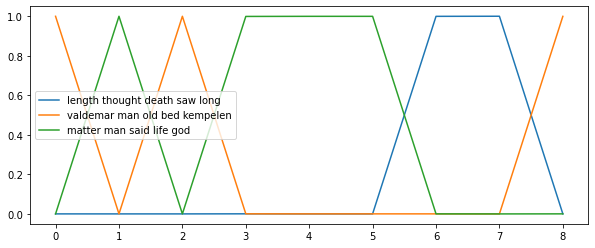

In [732]:
topiclabeling = [getwords(topic) for topic in ['Topic 1', 'Topic 2', 'Topic 3']]
pd.DataFrame(ldaOut, columns=topiclabeling).plot(figsize=(10,4))

In [733]:
topiclabeling

['length thought death saw long',
 'valdemar man old bed kempelen',
 'matter man said life god']

With new comparison points, I wanted to see if stories that included females had more adjectives than stories with only male pronouns, as I argued that females in Poe’s stories were only depicted by their physical appearance or helplessness. Utilizing parts of speech tagging, I took the proportion of adjectives in the stories with both male and female pronouns, and unfortunately had inconclusive results. I originally put my results in a scatter plot, to plot the correlation between adjective proportions and male to female pronoun ratio, however I could just tell from the plot that there was no relationship between the two. Just to make sure, I calculated the correlation coefficient to see if there was something I did not see. My correlation coefficient was 0.05, signifying to me that there was definitely no relationship at all. I decided then to look at commonly used adjectives within each short story. The only story that had any adjectives dealing with superficial appearances was “The Assignation”, a romance about a woman entering an affair with the man who saves her child only to die along with him, from suspected suicide. Though the story stems from the event where her child dropped into the canal and details the blossoming of the mutual romance, “The Assignation” has eight times more male pronouns than female pronouns. In a concordance of the word beautiful, the word was mentioned mostly to describe the beauty of the woman, only used one other time in reference to something else. Though this is a minor finding within a large corpus, this individual case might support the idea of the helpless and beautiful woman, acting as a plot device to push the typical heroic man to the forefront. 

In [719]:
#subset of stories that feature male and female pronouns
MandF = [MyCorpus[0], MyCorpus[1], MyCorpus[2], MyCorpus[6], MyCorpus[7], MyCorpus[12], MyCorpus[13], MyCorpus[15], MyCorpus[16], MyCorpus[17], MyCorpus[18], MyCorpus[20], MyCorpus[21]]

In [720]:
def adjpro(txt):
    ''' Function to get the proportion of adjectives'''
    tokenizing = nltk.word_tokenize(txt.lower())
    isalpha = [ i for i in tokenizing if i.isalpha()]
    tagged= nltk.pos_tag(isalpha)
    counts = Counter(tag for word,tag in tagged)
    return counts['JJ']/len(isalpha)

In [721]:
#applying adjective proportions to all my stories in the subset
propadjs=[adjpro(i) for i in MandF]

In [723]:
otherajddf=pd.DataFrame(propadjs, index=['The Purloined Letter', 'The Thousand-and-second Tale of Scheherezade', 'A Descent into the Maelström'
                              ,'The Black Cat', 'The Fall of the House of Usher','The Island of the Fay', 'The Assignation'
                              ,'The Premature Burial', 'The Domain of Arnheim',"Landor's Cottage", 'William Wilson', 'Berenice'
                              , 'Eleonora'])
finaldf = otherajddf.insert(1, "Male vs. Female Ratio", [14.142857, 2.333333, 4.125, 3.0, 6.818182, 0.444444, 8.166667, 2.272727, 53.0, 1.5
                                      ,45.0, 1.333333, 0.095238], True)
hm = otherajddf.rename(columns={0: "Adjective Proportion"})
x = list(hm["Adjective Proportion"])
y = list(hm["Male vs. Female Ratio"])
corrmat = np.corrcoef(x, y)
corr = corrmat[0,1]
r= corr**2
print(r)
#Almost no correlation

0.05067967622297492


In [724]:
def adj(txt):
    ''' Function to get  adjectives'''
    tokenizing = nltk.word_tokenize(txt.lower())
    isalpha = [ i for i in tokenizing if i.isalpha()]
    tagged= nltk.pos_tag(isalpha)
    adjective = [word for word,pos in tagged if (pos == 'JJ')]
    counts2 = Counter(adjective)
    return counts2.most_common(10)

In [725]:
allcomadjs = [adj(txt) for txt in MyCorpus]
adjdf = pd.DataFrame(allcomadjs, index = Titles)
adjdf

,0,1,2,3,4,5,6,7,8,9
The Purloined Letter,"(i, 18)","(certain, 12)","(first, 12)","(possible, 10)","(good, 8)","(such, 8)","(other, 8)","(ordinary, 8)","(own, 8)","(little, 7)"
The Thousand-and-second Tale of Scheherezade,"(great, 17)","(i, 12)","(black, 11)","(other, 8)","(such, 8)","(little, 6)","(good, 6)","(whole, 6)","(many, 5)","(several, 5)"
A Descent into the Maelström,"(i, 21)","(great, 15)","(little, 13)","(old, 10)","(such, 10)","(first, 8)","(full, 7)","(other, 7)","(black, 6)","(lofoden, 6)"
Von Kempelen and His Discovery,"(few, 6)","(s, 5)","(large, 5)","(own, 4)","(little, 4)","(whole, 4)","(other, 4)","(scientific, 3)","(full, 3)","(i, 3)"
Mesmeric Revelation,"(ultimate, 15)","(unparticled, 14)","(rudimental, 14)","(i, 11)","(mesmeric, 9)","(mere, 7)","(other, 7)","(god, 7)","(organic, 6)","(external, 5)"
The Facts in the Case of M. Valdemar,"(i, 14)","(mesmeric, 8)","(few, 8)","(last, 6)","(s, 6)","(present, 5)","(first, 5)","(other, 5)","(same, 5)","(little, 4)"
The Black Cat,"(i, 22)","(own, 6)","(black, 5)","(large, 5)","(such, 5)","(mere, 4)","(little, 4)","(many, 4)","(great, 4)","(old, 4)"
The Fall of the House of Usher,"(long, 13)","(i, 12)","(certain, 12)","(many, 11)","(wild, 10)","(low, 8)","(usher, 7)","(other, 7)","(full, 7)","(terrible, 6)"
Silence: a Fable,"(i, 3)","(other, 3)","(lofty, 3)","(tall, 3)","(gray, 3)","(covert, 3)","(fable, 2)","(dreary, 2)","(quiet, 2)","(red, 2)"
The Masque of the Red Death,"(red, 6)","(whole, 6)","(such, 5)","(own, 4)","(first, 4)","(other, 4)","(sharp, 3)","(deep, 3)","(tall, 3)","(blue, 3)"


In [734]:
tokenizedassig = nltk.word_tokenize(Assignation)
textassig = nltk.Text(tokenizedassig)
textassig.concordance('beautiful', lines=20)

Displaying 5 of 5 matches:
e ! And the Marchesa ! Her lip—her beautiful lip trembles ; tears are gathering
 he thoughtfully , “ the Venus—the beautiful Venus ? —the Venus of the Medici ?
 the poet and scholar Politian ’ s beautiful tragedy “ The Orfeo , ” ( the firs
parable from the perfection of the beautiful . Her right arm lay folded over he
 ! —poisoned ! Oh , beautiful—oh , beautiful Aphrodite ! ” Bewildered , I flew 


   Being that men always seem to be in the forefront, I wanted to see if there was any indication that the woman’s importance to the story was only in reference to the man. This to me is a sign of objectification; the woman not being an individual without the man. To do this, I looked for parts of speech patterns within the text that showed the possessions of men within the narratives. I looked for patterns within texts that had more male pronouns than female pronouns, the pattern being a possessive pronoun followed by a noun, then sorted them from most the most commonly occurring patterns. In a couple of the stories, patterns that I saw that aligned with what I was looking for were “his wife”, “his malady” and “his queen”, but the results were quite disappointing and not what I had in mind. When I looked past my preconceived notions, I noticed something different. The pattern was showing me characteristics that the characters possessed as well. Some of these characteristics in men are, but are not limited to, “success”, “mind, and “intellect”. On the other hand, when the possessive pronoun was rarely a woman, some of the characteristics were her “pride”, “naivety”, ”name”, and “hair”. I could really see the difference in the way men were regarded in Poe’s stories, compared to women, in this specific analysis. 


In [38]:
def tagging(txt):
    ''' Function to tag POS'''
    tokenizing2 = nltk.word_tokenize(txt.lower())
    isalpha2 = [ i for i in tokenizing2 if i.isalpha()]
    tagged2= nltk.pos_tag(isalpha2)
    return tagged2

In [742]:
#tagging each text in the subset
tagged10 = [tagging(txt) for txt in MandF]

#### **Note: I really tried to create a function here, but with the list iterations it was difficult for me to. I also could not fit my entire corpus through here, so I resorted to doing this by hand. Error was "too many items to unpack". Tried to iterate and fix the function, but it did not work.

In [778]:
list0=[]
for i, wtp in enumerate(tagged10[0]):
    if i == len(tagged10[0]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[0][i+1]
    if tag == 'PRP$':
        if nextt == "NN":
            list0.append([word, nextw])
counts0 = Counter(tuple(item) for item in list0).most_common(10)

In [779]:
list1=[]
for i, wtp in enumerate(tagged10[1]):
    if i == len(tagged10[1]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[1][i+1]
    if tag == 'PRP$':
        if nextt == "NN":
            list1.append([word, nextw])
list1
counts1=Counter(tuple(item) for item in list1).most_common(10)

In [780]:
list2=[]
for i, wtp in enumerate(tagged10[2]):
    if i == len(tagged10[2]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[2][i+1]
    if tag == 'PRP$':
        if nextt == "NN":
            list2.append([word, nextw])
list2
counts2=Counter(tuple(item) for item in list2).most_common(10)

In [781]:
list3=[]
for i, wtp in enumerate(tagged10[3]):
    if i == len(tagged10[3]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[3][i+1]
    if tag == 'PRP$':
        if nextt == "NN":
            list3.append([word, nextw])
list3
counts3=Counter(tuple(item) for item in list3).most_common(10)

In [782]:
list4=[]
for i, wtp in enumerate(tagged10[4]):
    if i == len(tagged10[4]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[4][i+1]
    if tag == 'PRP$':
        if nextt == "NN":
            list4.append([word, nextw])
list4
counts4=Counter(tuple(item) for item in list4).most_common(10)

In [783]:
list5=[]
for i, wtp in enumerate(tagged10[5]):
    if i == len(tagged10[5]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[5][i+1]
    if tag == 'PRP$':
        if nextt == "NN":
            list5.append([word, nextw])
list5
counts5=Counter(tuple(item) for item in list5).most_common(10)

In [784]:
list6=[]
for i, wtp in enumerate(tagged10[6]):
    if i == len(tagged10[6]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[6][i+1]
    next2w, next2t = tagged10[6][i+2]
    if tag == 'PRP$':
        if nextt == "NN":
            list6.append([word, nextw])
list6
counts6=Counter(tuple(item) for item in list6).most_common(10)

In [785]:
list7=[]
for i, wtp in enumerate(tagged10[7]):
    if i == len(tagged10[7]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[7][i+1]
    if tag == 'PRP$':
        if nextt == "NN":
            list7.append([word, nextw])
list7
counts7=Counter(tuple(item) for item in list7).most_common(10)

In [786]:
list8=[]
for i, wtp in enumerate(tagged10[8]):
    if i == len(tagged10[8]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[8][i+1]
    if tag == 'PRP$':
        if nextt == "NN":
            list8.append([word, nextw])
list8
counts8=Counter(tuple(item) for item in list8).most_common(10)

In [787]:
list9=[]
for i, wtp in enumerate(tagged10[9]):
    if i == len(tagged10[9]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[9][i+1]
    if tag == 'PRP$':
        if nextt == "NN":
            list9.append([word, nextw])
list9
counts9=Counter(tuple(item) for item in list9).most_common(10)

In [788]:
list10=[]
for i, wtp in enumerate(tagged10[10]):
    if i == len(tagged10[10]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[10][i+1]
    if tag == 'PRP$':
        if nextt == "NN":
            list10.append([word, nextw])
list10
counts10=Counter(tuple(item) for item in list10).most_common(10)

In [794]:
list11=[]
for i, wtp in enumerate(tagged10[11]):
    if i == len(tagged10[11]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[11][i+1]
    if tag == 'PRP$':
        if nextt == "NN":
            list11.append([word, nextw])
list11
counts11=Counter(tuple(item) for item in list11).most_common(10)

[(('itself', 'berenice'), 1), (('me', 'pain'), 1)]

In [793]:
list12=[]
for i, wtp in enumerate(tagged10[12]):
    if i == len(tagged10[12]) - 3:
        break
    word, tag = wtp
    nextw, nextt = tagged10[12][i+1]
    if tag == 'PRP$':
        if nextt == "NN":
            list12.append([word, nextw])
list12
counts12=Counter(tuple(item) for item in list12).most_common(10)
counts12

[(('her', 'heart'), 1)]

In [791]:
allcounters = [counts0, counts1, counts2, counts3, counts4, counts5, counts6, counts7, counts8, counts9, counts10, counts11, counts12]
dfAllCounts = pd.DataFrame(allcounters, index= ['The Purloined Letter', 'The Thousand-and-second Tale of Scheherezade', 'A Descent into the Maelström'
                              ,'The Black Cat', 'The Fall of the House of Usher','The Island of the Fay', 'The Assignation'
                              ,'The Premature Burial', 'The Domain of Arnheim',"Landor's Cottage", 'William Wilson', 'Berenice'
                              , 'Eleonora'])
dfAllCounts

,0,1,2,3,4,5,6,7,8,9
The Purloined Letter,"((my, friend), 5)","((his, meerschaum), 2)","((their, kind), 2)","((his, opponent), 2)","((his, success), 2)","((his, hotel), 2)","((our, apartment), 1)","((his, comprehension), 1)","((his, visitor), 1)","((our, visitor), 1)"
The Thousand-and-second Tale of Scheherezade,"((his, vow), 3)","((her, sister), 2)","((her, husband), 2)","((its, body), 2)","((its, back), 2)","((my, knowledge), 1)","((his, queen), 1)","((his, beard), 1)","((her, up), 1)","((her, name), 1)"
A Descent into the Maelström,"((my, mind), 3)","((my, heart), 3)","((its, violence), 2)","((our, boat), 2)","((my, elder), 2)","((his, head), 2)","((my, brother), 2)","((my, hold), 2)","((his, body), 1)","((his, elbow), 1)"
The Black Cat,"((my, wife), 8)","((my, hand), 5)","((my, soul), 3)","((my, heart), 3)","((my, disposition), 2)","((my, bed), 2)","((my, reason), 2)","((my, attention), 2)","((my, bosom), 2)","((my, very), 1)"
The Fall of the House of Usher,"((my, friend), 6)","((his, countenance), 4)","((his, face), 3)","((my, attention), 3)","((my, spirit), 2)","((my, horse), 2)","((his, malady), 2)","((his, master), 2)","((his, family), 2)","((my, presence), 2)"
The Island of the Fay,"((her, shadow), 2)","((its, blackness), 2)","((their, la), 1)","((its, exercise), 1)","((its, expression), 1)","((its, course), 1)","((its, prison), 1)","((my, dreamy), 1)","((my, position), 1)","((my, fancy), 1)"
The Assignation,"((my, acquaintance), 3)","((his, frame), 2)","((my, friend), 2)","((my, soul), 2)","((my, spirit), 2)","((his, wife), 1)","((my, gondola), 1)","((their, victim), 1)","((her, name), 1)","((her, hair), 1)"
The Premature Burial,"((my, memory), 3)","((his, wife), 2)","((her, lover), 2)","((my, soul), 2)","((her, family), 1)","((her, entombment), 1)","((her, escape), 1)","((her, shroud), 1)","((her, pride), 1)","((her, nativity), 1)"
The Domain of Arnheim,"((my, friend), 7)","((his, life), 2)","((his, intellect), 2)","((his, mind), 2)","((his, attention), 2)","((its, adaptation), 2)","((its, truth), 2)","((their, azure), 1)","((his, cradle), 1)","((his, grave), 1)"
Landor's Cottage,"((its, course), 3)","((its, way), 3)","((its, bottom), 2)","((my, attention), 2)","((my, path), 1)","((its, effort), 1)","((my, uncertainty), 1)","((my, knapsack), 1)","((my, hound), 1)","((its, kind), 1)"


 Although I attempted to do a more formal analysis of the analysis I had previously done by looking at adjectives and sentence structure with Spacy, I was unsuccessful. Rendering some of the syntax trees for a few of the stories in my corpus, I was unable to find any case where the female was tagged as an object instead of a pronoun, which would be something that could support my argument that Poe objectifies the females in his stories. Though my failure does not exactly support my argument, I do not think that objectification has to happen in a literal sense for it to be interpreted as that. I also was not able to find anything significant from looking at the ancestors of the adjectives in stories that, I had noticed in my previous analysis, gave men better characteristics than women. There were obvious things I noticed, like the adjectives lovely, young, and beautiful were mostly in reference to the female character in “The Assignation”, but not many stand out adjectives were applied to men. This, again, does not support my argument. However, I think this may be because the male is always the narrator. The way the narrator would describe themselves would not be in a third person form, therefore, instead of looking for the ancestor of the adjective being a noun or personal pronoun, it would be a possessive pronoun, which is not shown in this analysis. Even though I was unsuccessful in this particular analysis, I was able to reflect on why I was unsuccessful in doing so, revealing more about the meticulous nature of textual analysis and what this means for my specific literary argument. 


In [938]:
LetterDoc = nlp(Letter)

In [939]:
LetterSents = list(LetterDoc.sents)

In [958]:
#rending syntactic tree for "The Purloined Letter"
MentionFemale = LetterSents[48]
#spacy.displacy.render(MentionFemale)

In [959]:
AssigDoc = nlp(Assignation)

In [973]:
AssigSents = list(AssigDoc.sents)

In [998]:
#rending syntactic tree for "The ASsignation"
MentionFemale0 = AssigSents[50]
MentionFemale1 = AssigSents[67]
#spacy.displacy.render(MentionFemale0)
#spacy.displacy.render(MentionFemale1)

In [1002]:
AssigADJ= [(w, list(w.ancestors)) for w in AssigDoc if w.pos_ == 'ADJ']

In [967]:
ArnDoc = nlp(Arnheim)

In [1003]:
#Adjectives in "The Domain of Arnheim"
ArnADJ= [(w, list(w.ancestors)) for w in ArnDoc if w.pos_ == 'ADJ']

   For my last textual analysis, I decided to do analyses that were more context based, such as lexical dispersion plots, ngrams, and concordances, to take a closer look at some of my texts before I reached my conclusions. Beginning my project, I argued that women were only used as plot devices to further the male narrative. To test this, I did lexical dispersion plots to see how females were used throughout narrative time in the stories that did have female pronouns. In a majority of the lexical dispersion plots, the pronouns “she” and “her” showed up mainly at the beginning and/or end of the stories, while in a couple of the stories, the female pronouns were concentrated towards the middle of the plot. On the same lexical dispersion plots, pronouns for males were scattered throughout narrative time, rarely ever having a gap. Interpreting the results of these lexical dispersion plots confirms that Poe uses the female to advance the plot, allowing the male narrator or character to continue the body of the narrative, then uses the female as part of the resolution. The inclusion of women throughout narrative time paints the stereotyped image of the helpless woman; the narrative begins with a helpless maiden, the only person who has the power to help her is a man, and the story resolves with her being helped by him. However, I realize that my corpus is very diverse, filled with different narratives and genres. One of the stories I am aware does not follow the aforementioned narrative is “The Black Cat”, though it is much more gruesome. “The Black Cat” follows the narrative of a tormented, alcoholic man. Throughout the narrative, under the influence of alcohol, his anger grows and spirals out of control to the point where he eventually kills his beloved cat, then wife. This story is obviously not one of a savior man and a helpless maiden, but it is the very thing that Poe finds most poetic. In the lexical dispersion plot, the wife is mentioned in the beginning, middle, and end, a bit different than some other stories in the corpus. Doing a concordance on this, the context wife is mentioned is only through the point of view of the man, advancing his own narrative and descent into murdering her. Though the narrative of “The Black Cat” differs from other stories, the female in the narrative still falls victim to the power of the man, but to a severe extent. I attempted to look for more signs of this within ngrams, observing if anything explicitly repeated would convey this. However, there was not much that I could find from the ngrams. Aside from the results of the nGrams, I feel like my analyses were successful in supporting my argument. It is remarkable that even though females are the ones who introduce the plot, they are not assigned important roles within the story, an indication of how dispensible the female might be to Poe.  

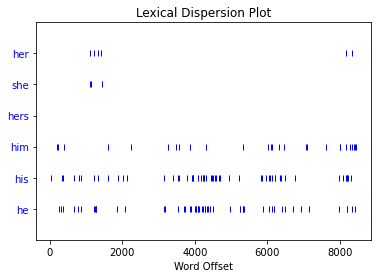

In [1124]:
#Even though I looked though all the lexical dispersion plots, here are the most interesting ones. 
#Lexical dispersion plot for "The Purloined Letter"
pronounz = ["her","she", "hers", "him", "his","he"]
tokenizing = [nltk.word_tokenize(txt) for txt in MyCorpus]
textstuff = nltk.Text(tokenizing[0])
textstuff.dispersion_plot(pronounz)

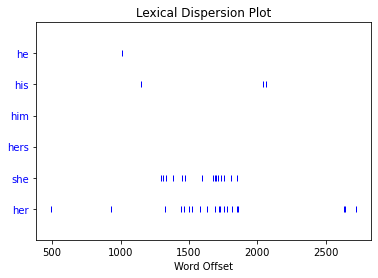

In [1135]:
#Lexical dispersion plot for "Eleonora"
textstuff0 = nltk.Text(tokenizing[21])
textstuff0.dispersion_plot(pronounz)

In [1138]:
#Lexical dispersion plot for "The Domain of ArnHeim"
tokenizing = [nltk.word_tokenize(txt) for txt in MyCorpus]
textstuff = nltk.Text(tokenizing[16])
#textstuff.dispersion_plot(pronounz)

In [1151]:
#Function to get 4 grams
def multigrams(text):
    '''A function to get Trigrams'''
    tokens = nltk.word_tokenize(text)
    lower = [i.lower() for i in tokens]
    tokensalpha = [ i for i in lower if i.isalpha()]
    multigrams = list(nltk.ngrams(tokensalpha,4))
    themultigrams= Counter(multigrams).most_common(10)
    return themultigrams

In [1012]:
multi =[multigrams(text) for text in MyCorpus]

In [1015]:
pd.DataFrame(multi, index=Titles)

,0,1,2,3,4,5,6,7,8,9
The Purloined Letter,"((s, knowledge, of, the), 4)","((that, the, letter, is), 3)","((as, a, matter, of), 3)","((the, letter, is, not), 3)","((within, the, limits, of), 3)","((a, great, deal, of), 2)","((the, fact, is, we), 2)","((i, will, tell, you), 2)","((that, is, to, say), 2)","((robber, s, knowledge, of), 2)"
The Thousand-and-second Tale of Scheherezade,"((hum, said, the, king), 4)","((the, surface, of, the), 3)","((said, the, king, we), 3)","((a, black, cat, i), 2)","((black, cat, i, think), 2)","((the, nature, of, things), 2)","((get, up, and, be), 2)","((i, am, sorry, to), 2)","((am, sorry, to, say), 2)","((and, the, rat, the), 2)"
A Descent into the Maelström,"((as, far, as, the), 2)","((far, as, the, eye), 2)","((as, the, eye, could), 2)","((of, the, ocean, in), 2)","((in, the, immediate, vicinity), 2)","((the, immediate, vicinity, of), 2)","((immediate, vicinity, of, the), 2)","((at, the, same, moment), 2)","((the, character, of, the), 2)","((in, a, few, minutes), 2)"
Von Kempelen and His Discovery,"((von, kempelen, and, his), 2)","((in, a, case, of), 2)","((a, case, of, this), 2)","((case, of, this, kind), 2)","((to, the, diary, of), 2)","((the, diary, of, sir), 2)","((diary, of, sir, humphrey), 2)","((of, sir, humphrey, davy), 2)","((the, courier, and, enquirer), 2)","((i, need, not, go), 2)"
Mesmeric Revelation,"((of, the, unparticled, matter), 4)","((there, can, be, no), 3)","((the, matter, of, which), 3)","((similar, ones, to, the), 3)","((in, the, inorganic, life), 3)","((the, region, of, the), 2)","((as, well, as, in), 2)","((he, will, never, be), 2)","((the, unparticled, matter, the), 2)","((that, which, we, attach), 2)"
The Facts in the Case of M. Valdemar,"((of, his, approaching, dissolution), 2)","((his, approaching, dissolution, as), 2)","((the, next, night, when), 2)","((make, the, experiment, of), 2)","((i, fear, you, have), 2)","((at, the, expiration, of), 2)","((the, expiration, of, this), 2)","((expiration, of, this, period), 2)","((of, the, mesmeric, influence), 2)","((it, is, quite, impossible), 2)"
The Black Cat,"((went, about, the, house), 2)","((one, of, its, eyes), 2)","((to, the, character, of), 2)","((it, i, knew, that), 2)","((rid, myself, of, the), 2)","((i, am, almost, ashamed), 2)","((am, almost, ashamed, to), 2)","((it, from, the, house), 2)","((the, black, cat, for), 1)","((black, cat, for, the), 1)"
The Fall of the House of Usher,"((of, the, house, of), 4)","((the, house, of, usher), 4)","((as, well, as, in), 3)","((of, the, building, in), 3)","((of, the, lady, madeline), 3)","((i, know, not, how), 2)","((in, the, contemplation, of), 2)","((the, contemplation, of, the), 2)","((earnest, desire, to, see), 2)","((desire, to, see, me), 2)"
Silence: a Fable,"((of, the, man, and), 6)","((the, actions, of, the), 5)","((actions, of, the, man), 5)","((the, man, and, the), 5)","((man, and, the, man), 5)","((sat, upon, the, rock), 5)","((upon, the, rock, and), 4)","((and, i, lay, close), 4)","((i, lay, close, within), 4)","((and, observed, the, actions), 4)"
The Masque of the Red Death,"((of, the, red, death), 3)","((of, the, prince, s), 2)","((that, the, prince, prospero), 2)","((there, was, a, sharp), 2)","((chiming, of, the, clock), 2)","((of, the, clock, and), 2)","((the, clock, and, then), 2)","((that, he, was, not), 2)","((taking, hue, from, the), 2)","((upon, the, sable, carpet), 2)"


In [1152]:
# Another lexical dispersion plot of "The Black Cat"
fpronouns = ["her","she","wife"]
tokenizing = [nltk.word_tokenize(txt) for txt in MyCorpus]
textstuff = nltk.Text(tokenizing[21])
#textstuff.dispersion_plot(fpronouns)

In [1143]:
#Getting concordances of "her"
tokenizedTBC = nltk.word_tokenize(TheBlackCat)
textTBC = nltk.Text(tokenizedTBC)
textTBC.concordance('her', lines=20)

Displaying 3 of 3 matches:
 my wife . At length , I even offered her personal violence . My pets , of cour
n demoniacal , I withdrew my arm from her grasp and buried the axe in her brain
 from her grasp and buried the axe in her brain . She fell dead upon the spot ,


In [1154]:
#Getting concordances of "she"
tokenizedTBC = nltk.word_tokenize(TheBlackCat)
textTBC = nltk.Text(tokenizedTBC)
textTBC.concordance('she', lines=20)

Displaying 4 of 4 matches:
ing my partiality for domestic pets , she lost no opportunity of procuring thos
ats as witches in disguise . Not that she was ever _serious_ upon this point—an
e most patient of sufferers . One day she accompanied me , upon some household 
asp and buried the axe in her brain . She fell dead upon the spot , without a g


In [1155]:
#Getting concordances of "wife"
tokenizedTBC = nltk.word_tokenize(TheBlackCat)
textTBC = nltk.Text(tokenizedTBC)
textTBC.concordance('wife', lines=20)

Displaying 10 of 10 matches:
 early , and was happy to find in my wife a disposition not uncongenial with m
In speaking of his intelligence , my wife , who at heart was not a little tinc
lf to use intemperate language to my wife . At length , I even offered her per
It was with great difficulty that my wife , a servant , and myself , made our 
immediately a great favorite with my wife . For my own part , I soon found a d
e , however , only endeared it to my wife , who , as I have already said , pos
t would be possible to conceive . My wife had called my attention , more than 
 abandoned myself , my uncomplaining wife , alas , was the most usual and the 
 blow was arrested by the hand of my wife . Goaded , by the interference , int
behind which stood the corpse of the wife of my bosom . But may God shield and


As I ended my data analysis with an analysis of the context of Poe's stories, I will end the project with an emphasis on the context of the time of Poe’s stories. The trope of the helpless maiden was especially popular in works of 19th century literature, therefore, I do not want to single Poe out as the only culprit (Martens 23). Poe, through in and throughout, seemed like a product of his environment, from his tragic upbringing to the misogynistic ideas that were appropriate at the time (Xiong 95). Though I did find evidence to support my argument through my data analysis and close reading, seeing as women were being depicted as helpless and by their physicality, while men were depicted positively and in the spotlight, I can not say that everything was successful. With all of the stories in my corpus being so diverse and varied, my argument only applies to some of these stories, implying that this depiction of females does not happen throughout all of Edgar Allen Poe’s works. I realized that not every story was going to fit my premise from the fact that there were stories that did not even have female pronouns. All things considered the objectification of women and the preference for a powerful male character, does exist in Poe’s stories; however, not all of them, and worth mentioning is that fact that it may not be a reflection of his own personal beliefs, but the beliefs within the context of the time. 

## Works Cited

Martens, Elien. “The representation of women in the works of Edgar Allan Poe.” *Universiteit Gent*, 2013.

Xiong, Ke. "The Influence of Edgar Allan Poe's Life Experience on His Writings." *Advances in Social Science, Education and Humanities Research*, volume 284, 2018, pp. 93-96.